# Correlation

## Load data after handling null

In [2]:
from util.build_dataset import build_master
origin_df = build_master(dataset='clean_origin_fmp', date="201908")
process_df = build_master(dataset='process_fmp', date="201908")


2020-04-14 15:18:19:manage:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201908.csv in s3 'production-bobsim'
2020-04-14 15:18:20:core:<INFO> missing values: 
 None
2020-04-14 15:18:22:manage:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-14 15:18:23:manage:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-14 15:18:24:manage:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/process/csv/201908.csv in s3 'production-bobsim'
2020-04-14 15:18:24:manage:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/process/csv/201908.csv in s3 'production-bobsim'
2020-04-14 15:18:24:manage:<INFO> 1 files is loaded from public_data/open_data_marine_weather/process/csv/201908.csv in s3 'production-bobsim'


In [3]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32823 entries, 0 to 32822
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                32823 non-null  datetime64[ns]
 1   region              32823 non-null  object        
 2   standard_item_name  32823 non-null  object        
 3   price               32823 non-null  float64       
 4   t_daily_preci       32823 non-null  float32       
 5   t_temper_lowest     32823 non-null  float32       
 6   t_rel_hmd_min       32823 non-null  float32       
 7   m_wave_p_avg        32823 non-null  float32       
 8   m_atm_press_avg     32823 non-null  float32       
 9   m_rel_hmd_avg       32823 non-null  float32       
 10  m_temper_avg        32823 non-null  float32       
 11  m_water_temper_avg  32823 non-null  float32       
 12  m_max_wave_h_avg    32823 non-null  float32       
 13  m_max_wave_h_high   32823 non-null  float32   

In [3]:
origin_df.describe()

,price,t_dur_preci,t_daily_preci,t_temper_avg,t_temper_lowest,t_temper_high,t_wind_spd_max,t_wind_spd_avg,t_rel_hmd_min,t_rel_hmd_avg,...,m_wave_p_high,m_wind_spd_avg,m_atm_press_avg,m_rel_hmd_avg,m_temper_avg,m_water_temper_avg,m_max_wave_h_avg,m_sign_wave_h_avg,m_sign_wave_h_high,m_max_wave_h_high
count,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,...,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000,32823.000000
mean,1897.648157,0.548129,5.433383,26.024994,22.349436,30.676273,4.011262,1.586097,58.719654,80.292419,...,8.219532,4.462862,1006.945374,85.210014,26.037788,25.956713,1.354616,0.812352,1.122027,1.930642
std,2528.347670,0.595320,7.040748,2.049915,2.001647,2.494551,0.575722,0.358135,7.274666,4.332423,...,1.498255,1.125974,3.995278,4.825366,0.867684,0.455417,0.474810,0.290645,0.376017,0.613607
min,31.000000,0.009263,0.002151,22.217022,18.348936,25.268085,3.297895,1.146809,47.148937,73.802132,...,5.547059,2.017647,996.221436,71.647057,24.023529,24.729412,0.564706,0.335294,0.500000,0.841176
25%,495.000000,0.064624,0.179787,24.441935,20.613979,29.620213,3.453684,1.265263,52.852631,77.164520,...,7.100000,3.641176,1006.329407,83.785713,25.694117,25.623529,1.068750,0.637500,0.847059,1.470588
50%,1175.750000,0.257340,2.006383,26.171276,23.086170,30.641489,3.893617,1.457447,57.659573,78.819359,...,7.905882,4.306250,1007.588257,86.666664,26.333334,26.143749,1.252941,0.758824,1.117647,1.900000
75%,2163.333333,0.944043,9.115957,28.048422,23.974468,32.701054,4.463158,1.822581,61.659573,83.605316,...,9.417647,5.175000,1009.358826,88.625000,26.570587,26.278572,1.580000,0.953333,1.350000,2.287500
max,24900.000000,2.209574,24.803192,28.432978,25.078724,34.145264,5.101064,2.368085,75.500000,90.443619,...,11.652942,6.693750,1012.285706,91.062500,27.100000,26.500000,2.537500,1.562500,2.082353,3.388235


In [4]:
numeric_df = origin_df.select_dtypes(exclude=['object', 'datetime64[ns]'])
numeric_df

,price,t_daily_preci,t_temper_lowest,t_rel_hmd_min,m_wave_p_avg,m_atm_press_avg,m_rel_hmd_avg,m_temper_avg,m_water_temper_avg,m_max_wave_h_avg,m_max_wave_h_high
0,238.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.062500,25.694117,24.729412,0.882353,1.252941
1,1450.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.062500,25.694117,24.729412,0.882353,1.252941
2,903.333333,3.237895,24.331579,58.642105,4.458824,1011.594116,91.062500,25.694117,24.729412,0.882353,1.252941
3,2560.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.062500,25.694117,24.729412,0.882353,1.252941
4,1580.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.062500,25.694117,24.729412,0.882353,1.252941
...,...,...,...,...,...,...,...,...,...,...,...
32818,1566.000000,0.109574,18.348936,47.148937,4.723529,1009.358826,71.647057,24.823530,25.268749,1.241176,1.647059
32819,1166.000000,0.109574,18.348936,47.148937,4.723529,1009.358826,71.647057,24.823530,25.268749,1.241176,1.647059
32820,714.000000,0.109574,18.348936,47.148937,4.723529,1009.358826,71.647057,24.823530,25.268749,1.241176,1.647059
32821,1058.000000,0.109574,18.348936,47.148937,4.723529,1009.358826,71.647057,24.823530,25.268749,1.241176,1.647059


## skew

In [5]:
from scipy.stats import skew
from util.pandas import get_numeric_df

def get_skews(df):
    return df.apply(lambda x : skew(x))

origin_skews = get_skews(get_numeric_df(origin_df))
x = origin_skews.rename("origin").to_frame()

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
process_skews = get_skews(get_numeric_df(process_df))
y = process_skews.rename("process").to_frame()
pd.concat([x,y], axis=1)

,origin,process
price,3.670128,3.670128
t_daily_preci,1.359788,0.367070
t_temper_lowest,-0.560996,-0.560996
t_rel_hmd_min,0.565466,0.565466
m_wave_p_avg,0.408102,0.408102
m_atm_press_avg,-1.145973,-1.145974
m_rel_hmd_avg,-1.213206,-1.213206
m_temper_avg,-0.859555,-0.859555
m_water_temper_avg,-0.917017,-0.917017
m_max_wave_h_avg,0.648480,0.648480


In [9]:
origin_df.head()

,date,region,standard_item_name,price,t_daily_preci,t_temper_lowest,t_rel_hmd_min,m_wave_p_avg,m_atm_press_avg,m_rel_hmd_avg,m_temper_avg,m_water_temper_avg,m_max_wave_h_avg,m_max_wave_h_high
0,2019-08-01,강원,감자,238.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.0625,25.694117,24.729412,0.882353,1.252941
1,2019-08-01,강원,건제품,1450.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.0625,25.694117,24.729412,0.882353,1.252941
2,2019-08-01,강원,고추,903.333333,3.237895,24.331579,58.642105,4.458824,1011.594116,91.0625,25.694117,24.729412,0.882353,1.252941
3,2019-08-01,강원,깻잎,2560.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.0625,25.694117,24.729412,0.882353,1.252941
4,2019-08-01,강원,돈육,1580.000000,3.237895,24.331579,58.642105,4.458824,1011.594116,91.0625,25.694117,24.729412,0.882353,1.252941


In [10]:
o_t_d_p = origin_df['t_daily_preci']
p_t_d_p = process_df['t_daily_preci']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def graphize(series, name="Histogram"):
    plt.title(name)
    sns.distplot(series)
    return None

#### distribution log transform or not

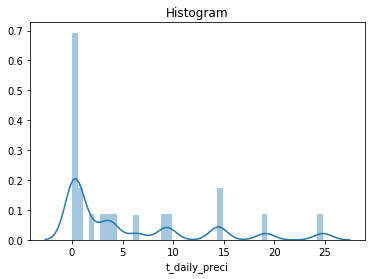

In [12]:
graphize(o_t_d_p)

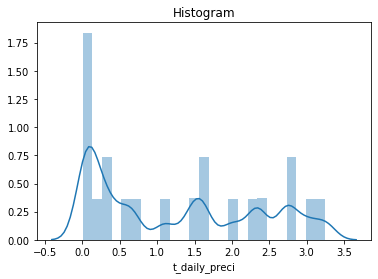

In [13]:
graphize(p_t_d_p)

## correlation

In [8]:
# default: method=pearson, min_periods=1
origin_corr = origin_df.corr()
origin_corr

,price,t_daily_preci,t_temper_lowest,t_rel_hmd_min,m_wave_p_avg,m_atm_press_avg,m_rel_hmd_avg,m_temper_avg,m_water_temper_avg,m_max_wave_h_avg,m_max_wave_h_high
price,1.000000,-0.000135,0.005458,-0.002171,0.002086,-0.001963,0.003960,0.006372,0.003630,0.001023,0.001644
t_daily_preci,-0.000135,1.000000,0.137731,0.618764,-0.056000,-0.149153,0.309275,-0.056720,-0.026399,0.366534,0.447749
t_temper_lowest,0.005458,0.137731,1.000000,0.144723,-0.000595,-0.408686,0.877964,0.796730,0.253411,0.080013,0.168324
t_rel_hmd_min,-0.002171,0.618764,0.144723,1.000000,0.226665,-0.391791,0.416115,-0.247863,-0.073482,0.492341,0.548120
m_wave_p_avg,0.002086,-0.056000,-0.000595,0.226665,1.000000,-0.337889,0.127886,0.048863,0.288744,0.600031,0.592476
m_atm_press_avg,-0.001963,-0.149153,-0.408686,-0.391791,-0.337889,1.000000,-0.252979,-0.412257,-0.473211,-0.768967,-0.789736
m_rel_hmd_avg,0.003960,0.309275,0.877964,0.416115,0.127886,-0.252979,1.000000,0.530021,0.116097,0.086953,0.170602
m_temper_avg,0.006372,-0.056720,0.796730,-0.247863,0.048863,-0.412257,0.530021,1.000000,0.632061,0.103594,0.144724
m_water_temper_avg,0.003630,-0.026399,0.253411,-0.073482,0.288744,-0.473211,0.116097,0.632061,1.000000,0.305065,0.321199
m_max_wave_h_avg,0.001023,0.366534,0.080013,0.492341,0.600031,-0.768967,0.086953,0.103594,0.305065,1.000000,0.972982


### correlation btw X and y

In [30]:
corr_target = abs(origin_corr["price"].drop("price"))
print(corr_target.sum())
a = corr_target.rename("origin").to_frame()

0.05087778034899348


In [31]:
process_corr = process_df.corr()
pcorr_target = abs(process_corr["price"].drop("price"))
print(pcorr_target.sum())
b = pcorr_target.rename("process").to_frame()

4.9281224125859


In [37]:
pd.concat([a,b], axis=1, join="inner").sum()

origin     0.050878
process    0.051630
dtype: float64

### sum of correlation coef

In [34]:
corr_target.drop("price").sum()

KeyError: "['price'] not found in axis"

## Test Each Normalization Method

In [547]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer ,MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer
import numpy as np

def log_transform(df):
    return np.log1p(df)

def sqrt_transform(df):
    return np.sqrt(df)

log = log_transform
sqrt = sqrt_transform
min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
max_abs = MaxAbsScaler()
normal = Normalizer()
quantile = QuantileTransformer()
box_cox = PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')

t_names = ['log', 'sqrt', 'min_max', 'standard', 'robust', 'max_abs', 'quantile', 'box_cox', 'yeo_johnson', 'None']
transformers = [log, sqrt, min_max, standard, robust, max_abs, quantile, box_cox, yeo_johnson, 'None']

In [548]:
import functools
from sklearn.base import BaseEstimator, TransformerMixin

def sum_coef(df):
    # default: method=pearson, min_periods=1
    # method{‘pearson’, ‘kendall’, ‘spearman’} 
    corr = df.corr()
    return abs(corr['당일조사가격'].drop('당일조사가격')).sum()

def analyze_skew(df):
    return get_skews(df)

def analyze_coef(df):
    return sum_coef(df)

def transform(transformer, df):
    if isinstance(transformer, TransformerMixin):
        return pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
    elif transformer == 'None':
        return df
    else: 
        return transformer(df)

In [549]:
df_list = list(map(functools.partial(transform, df=numeric_df), transformers))

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\scipy\stats\morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduc

### skew

In [550]:
skew_df = pd.concat(list(map(analyze_skew, df_list)), axis=1)
skew_df.columns = t_names
skew_df
# pd.DataFrame(list(map(analyze_skew, df_list)), columns=transformers)

,log,sqrt,min_max,standard,robust,max_abs,quantile,box_cox,yeo_johnson,None
당일조사가격,0.035898,1.641829,3.452630,3.452630,3.452630,3.452630,-0.000023,-0.000236,-0.000245,3.452630
평균기온(°C),-0.526854,-0.489448,-0.449521,-0.449521,-0.449521,-0.449521,0.001429,-0.180034,-0.179053,-0.449521
최저기온(°C),-0.647586,-0.605521,-0.560308,-0.560308,-0.560308,-0.560308,-0.000011,-0.224405,-0.222880,-0.560308
최고기온(°C),-0.798956,-0.722585,-0.641832,-0.641832,-0.641832,-0.641832,0.001013,-0.120122,-0.119275,-0.641832
최대 풍속(m/s),0.219769,0.265153,0.341649,0.341649,0.341649,0.341649,-0.000962,0.058644,0.067316,0.341649
평균 풍속(m/s)_x,0.573057,0.608093,0.750571,0.750571,0.750571,0.750571,-0.000022,0.118598,0.146442,0.750571
최소 상대습도(pct),0.326875,0.444296,0.565824,0.565824,0.565824,0.565824,0.000824,0.033605,0.034069,0.565824
평균 상대습도(pct)_x,0.589898,0.630985,0.673417,0.673417,0.673417,0.673417,-0.000575,0.105321,0.103891,0.673417
강수 계속시간(hr),0.158044,0.378678,0.864804,0.864804,0.864804,0.864804,-0.000490,-0.026950,0.042207,0.864804
일강수량(mm),0.046660,0.416607,1.109568,1.109568,1.109568,1.109568,0.000781,-0.146122,0.012724,1.109568


### sum of coef

In [551]:
pd.DataFrame(list(map(analyze_coef, df_list)), index=t_names, columns=['sum of coef'])

,sum of coef
log,0.047510
sqrt,0.036592
min_max,0.047548
standard,0.047548
robust,0.047548
max_abs,0.047548
quantile,0.058656
box_cox,0.050537
yeo_johnson,0.050254
None,0.047548


## Grid Search

In [552]:
numeric_df.head(5)

,당일조사가격,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,238.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
1,1450.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
2,990.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
3,1050.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
4,670.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059


### normalize y

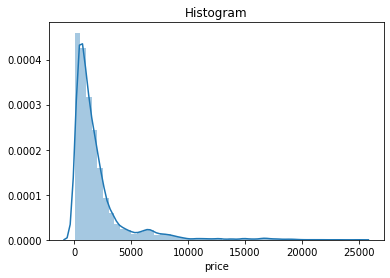

In [553]:
import matplotlib.pyplot as plt
import seaborn as sns

def graphize(series, name="Histogram"):
    plt.title(name)
    sns.distplot(series)
    return None

y = numeric_df['당일조사가격'].rename('price')
graphize(y)

In [554]:
l_ty = list(map(functools.partial(transform, df=pd.DataFrame(y)), transformers))

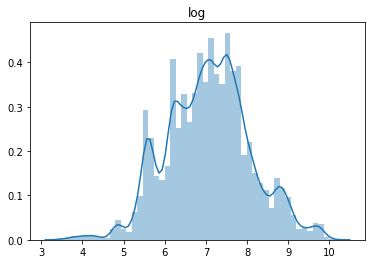

In [555]:
graphize(l_ty[0], name=t_names[0])

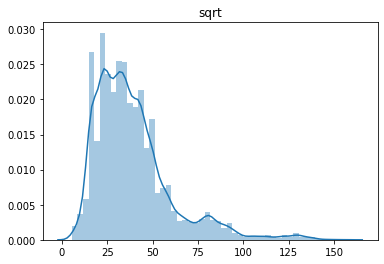

In [556]:
graphize(l_ty[1], name=t_names[1])

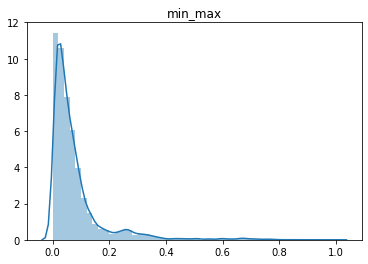

In [557]:
graphize(l_ty[2], name=t_names[2])

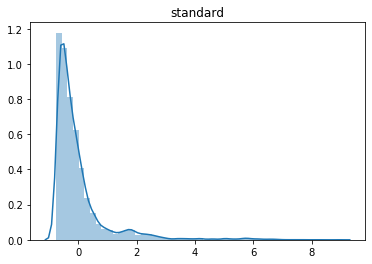

In [558]:
graphize(l_ty[3], name=t_names[3])

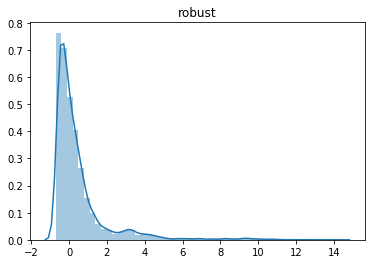

In [559]:
graphize(l_ty[4], name=t_names[4])

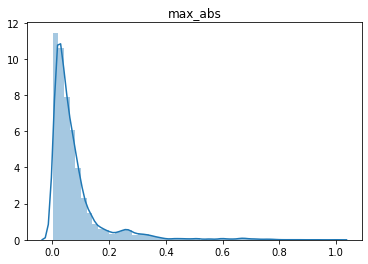

In [560]:
graphize(l_ty[5], name=t_names[5])

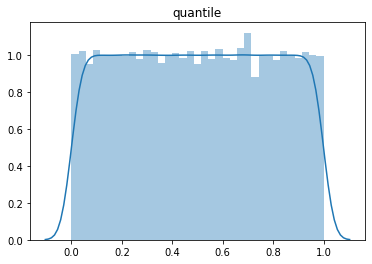

In [561]:
graphize(l_ty[6], name=t_names[6])

In [562]:
X = numeric_df.drop("당일조사가격" ,axis=1)

In [563]:
"""
    First iterate y, and then iterate X
"""

def corr_xy(x, y):
    corr = pd.concat([x,y] ,axis=1).corr()
    return abs(corr['price']).drop('price').sum()

def search_transformers(column, X, y):
    """
        iterate transformer for X and compare with y (corr_xy)
    """
    x = X[column]
    l_tx = list(map(functools.partial(transform, df=pd.DataFrame(x)), transformers))

    def func(x):
        return corr_xy(x, y)
    
    l_coef = list(map(func, l_tx))
 
    # find max coef and index 
    max_coef = max(l_coef)
    max_index = l_coef.index(max_coef)
    
    proper_transformer = t_names[max_index]
    return proper_transformer, max_coef

                
def grid_search(y, X):
    # iterate X
    return list(map(functools.partial(search_transformers, X=X, y=y), X.columns.tolist()))
   
# iterate y
result = list(map(functools.partial(grid_search, X=X), l_ty))

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning

In [564]:
result_df = pd.DataFrame(result, columns=X.columns, index=t_names)
result_df

,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),평균 풍속(m/s)_y,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,"(quantile, 0.002746868219911344)","(quantile, 0.002164941094224643)","(quantile, 0.0029785252139653585)","(quantile, 0.0006788511333647689)","(box_cox, 0.0005585500005455258)","(quantile, 0.0005508649332104334)","(min_max, 0.0010829658531626278)","(box_cox, 0.0010090562818121896)","(quantile, 0.001168669084179999)","(log, 0.0023960406806111576)","(quantile, 0.0024586880218782454)","(quantile, 0.003039279584607099)","(quantile, 0.0016699048004822552)","(log, 0.0045762053680702365)","(quantile, 0.004600908364629918)","(quantile, 0.00456949111516934)","(quantile, 0.004809239223879724)","(quantile, 0.0046052747445291505)","(box_cox, 0.005036641942013966)","(box_cox, 0.004593353975860025)"
sqrt,"(log, 0.001338190775378134)","(box_cox, 0.001373400658635128)","(log, 0.001503186888953695)","(quantile, 0.0008166439426507631)","(max_abs, 0.0004681972073146701)","(min_max, 0.0011461323969837887)","(max_abs, 0.00043646658754240415)","(box_cox, 0.0013749033477618478)","(standard, 0.0011094114571533066)","(log, 0.0012125498553228985)","(quantile, 0.002495343425273903)","(log, 0.00028585097397211995)","(quantile, 0.0039515534918430325)","(log, 0.004351235328486065)","(quantile, 0.003430329239377231)","(quantile, 0.0032477763643901955)","(quantile, 0.0035991263954315827)","(quantile, 0.0034473178077152546)","(min_max, 0.003693674703116909)","(box_cox, 0.003273408799769479)"
min_max,"(log, 0.00430774013106183)","(box_cox, 0.0038597073140120087)","(log, 0.004385821131826701)","(quantile, 0.0009585812831015703)","(sqrt, 0.0015766004697222965)","(min_max, 0.002178531039914264)","(None, 0.002046706467994077)","(box_cox, 0.0016725513701182587)","(standard, 0.0008003345968124098)","(quantile, 0.0006120181661436853)","(quantile, 0.0025020402555227)","(robust, 0.0021729019340408617)","(quantile, 0.005802358488076425)","(yeo_johnson, 0.004611273796582136)","(quantile, 0.0023321014781008892)","(quantile, 0.002041690759492252)","(quantile, 0.0024314681959399453)","(quantile, 0.0023348075880593195)","(min_max, 0.0025044986313449147)","(yeo_johnson, 0.0018541609886097692)"
standard,"(log, 0.004307740131061743)","(box_cox, 0.003859707314011977)","(log, 0.004385821131826689)","(quantile, 0.0009585812831015229)","(sqrt, 0.0015766004697223013)","(min_max, 0.002178531039914256)","(None, 0.002046706467994048)","(box_cox, 0.0016725513701182251)","(standard, 0.0008003345968124204)","(quantile, 0.000612018166143675)","(quantile, 0.0025020402555227033)","(robust, 0.0021729019340408465)","(quantile, 0.005802358488076313)","(yeo_johnson, 0.0046112737965821535)","(quantile, 0.0023321014781008775)","(quantile, 0.0020416907594922947)","(quantile, 0.00243146819593992)","(quantile, 0.0023348075880593516)","(min_max, 0.0025044986313449403)","(yeo_johnson, 0.0018541609886096844)"
robust,"(log, 0.0043077401310617144)","(box_cox, 0.0038597073140119917)","(log, 0.0043858211318265955)","(quantile, 0.0009585812831015188)","(sqrt, 0.0015766004697222596)","(min_max, 0.0021785310399142365)","(None, 0.0020467064679940148)","(box_cox, 0.0016725513701182195)","(standard, 0.0008003345968123981)","(quantile, 0.0006120181661437016)","(quantile, 0.0025020402555226717)","(robust, 0.002172901934040822)","(quantile, 0.005802358488076277)","(yeo_johnson, 0.00461127379658212)","(quantile, 0.002332101478100771)","(quantile, 0.0020416907594922634)","(quantile, 0.0024314681959399123)","(quantile, 0.0023348075880593355)","(min_max, 0.0025044986313448826)","(yeo_johnson, 0.0018541609886096669)"
max_abs,"(log, 0.004307740131061776)","(box_cox, 0.0038597073140119236)","(log, 0.004385821131826632)","(quantile, 0.0009585812831015468)","(sqrt, 0.001576600469722288)","(min_max, 0.002178531039914243)","(None, 0.002046706467994019)","(box_cox, 0.0016725513701182247)","(standa

In [17]:
sum_df = pd.DataFrame(np.array(result_df.values.tolist())[:, :, 1], result_df.index, result_df.columns).astype("float").sum(axis=1).rename("sum")
sum_df

NameError: name 'result_df' is not defined

In [566]:
transformer_df = pd.DataFrame(np.array(result_df.values.tolist())[:, :, 0], result_df.index, result_df.columns)
transformer_df

,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),평균 풍속(m/s)_y,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
sqrt,log,box_cox,log,quantile,max_abs,min_max,max_abs,box_cox,standard,log,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,box_cox
min_max,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
quantile,quantile,log,quantile,quantile,box_cox,standard,min_max,box_cox,standard,log,quantile,box_cox,log,log,quantile,quantile,quantile,quantile,box_cox,box_cox
box_cox,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
yeo_johnson,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
None,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson


In [567]:
final_df = pd.concat([sum_df, transformer_df], axis=1)
final_df

,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.055294,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
sqrt,0.042555,log,box_cox,log,quantile,max_abs,min_max,max_abs,box_cox,standard,...,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,box_cox
min_max,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
quantile,0.064474,quantile,log,quantile,quantile,box_cox,standard,min_max,box_cox,standard,...,quantile,box_cox,log,log,quantile,quantile,quantile,quantile,box_cox,box_cox
box_cox,0.055874,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
yeo_johnson,0.055803,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
None,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson


In [568]:
final_row = final_df.filter(like="quantile", axis=0)
final_row

,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
quantile,0.064474,quantile,log,quantile,quantile,box_cox,standard,min_max,box_cox,standard,...,quantile,box_cox,log,log,quantile,quantile,quantile,quantile,box_cox,box_cox


# Build Grid Search Pipeline

In [1]:
from data_pipeline.open_data_raw_material_price.core import OpenDataRawMaterialPrice
from data_pipeline.open_data_marine_weather.core import OpenDataMarineWeather
from data_pipeline.open_data_terrestrial_weather.core import OpenDataTerrestrialWeather
import pandas as pd
import functools
from sklearn.preprocessing import QuantileTransformer, PowerTransformer ,MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin


# transformer
def log_transform(df):
    return np.log1p(df)

def sqrt_transform(df):
    return np.sqrt(df)

log = log_transform
sqrt = sqrt_transform
min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
max_abs = MaxAbsScaler()
normal = Normalizer()
quantile = QuantileTransformer()
box_cox = PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')

t_names = ['log', 'sqrt', 'min_max', 'standard', 'robust', 'max_abs', 'quantile', 'yeo_johnson', 'None']
transformers = [log, sqrt, min_max, standard, robust, max_abs, quantile, yeo_johnson, 'None']

def sum_corr(df):
    # default: method=pearson, min_periods=1
    # method{‘pearson’, ‘kendall’, ‘spearman’} 
    corr = df.corr()
    return abs(corr['당일조사가격'].drop('당일조사가격')).sum()

def analyze_skew(df):
    return get_skews(df)

def analyze_coef(df):
    return sum_coef(df)

def transform(transformer, df):
    if isinstance(transformer, TransformerMixin):
        return pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
    elif transformer == 'None':
        return df
    else: 
        return transformer(df)


def build_dataset(date="201908"):
    t = OpenDataTerrestrialWeather(
        date=date
    )
    t_df = t.clean(t.filter(t.input_df))

    m = OpenDataMarineWeather(
        date=date
    )
    m_df = m.clean(m.filter(m.input_df))

    p = OpenDataRawMaterialPrice(
        date=date
    )
    p_df = p.clean(p.filter(p.input_df))
    print(p_df)


    w_df = pd.merge(
                t_df, m_df,
                how='inner', on="일시"
            )
    
    origin_df = pd.merge(
                    p_df, w_df, how="inner", left_on="조사일자", right_on="일시"
                ).drop("일시", axis=1).astype(dtype={"조사일자": "datetime64"})

    return origin_df.select_dtypes(exclude=['object', 'datetime64[ns]'])

def split_xy(df):
    X = df.drop("당일조사가격" ,axis=1)
    y = df['당일조사가격'].rename('price')
    return X, y

def corr_xy(x, y):
    corr = pd.concat([x,y] ,axis=1).corr()
    return abs(corr['price']).drop('price').sum()

def search_transformers(column, X: pd.DataFrame, y: pd.Series):
    """
        iterate transformer for X and compare with y (corr_xy)
    """
    x = X[column]
    l_tx = list(map(functools.partial(transform, df=pd.DataFrame(x)), transformers))

    l_coef = list(map(functools.partial(corr_xy, y=y), l_tx))
 
    # find max coef and index 
    max_coef = max(l_coef)
    max_index = l_coef.index(max_coef)
    
    proper_transformer = t_names[max_index]
    return proper_transformer, max_coef
                
def iterate_x(y: pd.Series, X: pd.DataFrame):
    # iterate X
    return list(map(functools.partial(search_transformers, X=X, y=y), X.columns.tolist()))

def grid_search(X: pd.DataFrame, y: pd.Series):
    """
    return: result grid, pd DataFrame
    """
    l_ty = list(map(functools.partial(transform, df=pd.DataFrame(y)), transformers))
    
    # iterate y
    result = list(map(functools.partial(iterate_x, X=X), l_ty))
    return pd.DataFrame(result, columns=X.columns, index=t_names)

def get_final_df(df):
    sum_df = pd.DataFrame(np.array(df.values.tolist())[:, :, 1], df.index, df.columns).astype("float").sum(axis=1).rename("sum")
    transformer_df = pd.DataFrame(np.array(df.values.tolist())[:, :, 0], df.index, df.columns)
    return pd.concat([sum_df, transformer_df], axis=1)


# main: pipeline
def pipeline(date="201908"):
    numeric_df = build_dataset(date=date)
    X, y = split_xy(numeric_df)
    result_df = grid_search(X, y)
    return get_final_df(result_df),sum_corr(numeric_df)

In [15]:
final08, origin08 = pipeline("201908")

2020-04-02 04:16:30:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 04:16:30:core:<INFO> Series([], dtype: int64)
2020-04-02 04:16:31:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 04:16:31:core:<INFO> Series([], dtype: int64)
2020-04-02 04:16:33:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201908.csv in s3 'production-bobsim'
2020-04-02 04:16:34:core:<INFO> no missing value at raw material price


            조사일자 조사지역명              품목명       당일조사가격
0     2019-08-01    강원         감자감자수미수미   238.000000
1     2019-08-01    강원  건제품건포도건포도(수입)수입  1450.000000
2     2019-08-01    강원      고추붉은고추홍고추일반   990.000000
3     2019-08-01    강원    고추풋고추꽈리고추꽈리고추  1050.000000
4     2019-08-01    강원      고추풋고추청양청양고추   670.000000
...          ...   ...              ...          ...
40507 2019-08-30  충북청주      팥팥(적두)붉은팥국산  1566.000000
40508 2019-08-30  충북청주  천연조미료류굵은소금천일염일반  1166.000000
40509 2019-08-30  충북청주  꽁치류꽁치꽁치(수입)수입냉동   714.000000
40510 2019-08-30  충북청주     새우류새우흰다리새우일반  1058.000000
40511 2019-08-30  충북청주   고추건고추햇화건고추햇산화건  2016.666667

[40512 rows x 4 columns]


C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning

In [16]:
print(origin08)
final08

0.04754771873052942


,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.055294,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
sqrt,0.042555,log,box_cox,log,quantile,max_abs,min_max,max_abs,box_cox,standard,...,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,box_cox
min_max,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
quantile,0.064474,quantile,log,quantile,quantile,box_cox,standard,min_max,box_cox,standard,...,quantile,box_cox,log,log,quantile,quantile,quantile,quantile,box_cox,box_cox
box_cox,0.055874,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
yeo_johnson,0.055803,quantile,quantile,quantile,quantile,box_cox,quantile,min_max,box_cox,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,box_cox,box_cox
None,0.050986,log,box_cox,log,quantile,sqrt,min_max,None,box_cox,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson


In [2]:
final07, origin7 = pipeline("201907")
# for Boxcox, Value Error

2020-04-02 06:11:35:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 06:11:35:core:<INFO> 강수 계속시간(hr)    1
dtype: int64
2020-04-02 06:11:49:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 06:11:49:core:<INFO> Series([], dtype: int64)
2020-04-02 06:13:18:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201907.csv in s3 'production-bobsim'
2020-04-02 06:13:19:core:<INFO> no missing value at raw material price


            조사일자 조사지역명              품목명       당일조사가격
0     2019-07-01    강원         감자감자수미수미   328.000000
1     2019-07-01    강원  건제품건포도건포도(수입)수입  1450.000000
2     2019-07-01    강원      고추붉은고추홍고추일반  1320.000000
3     2019-07-01    강원    고추풋고추꽈리고추꽈리고추   850.000000
4     2019-07-01    강원      고추풋고추청양청양고추   980.000000
...          ...   ...              ...          ...
42185 2019-07-31  충북청주      팥팥(적두)붉은팥국산  1566.000000
42186 2019-07-31  충북청주  천연조미료류굵은소금천일염일반  1166.000000
42187 2019-07-31  충북청주  꽁치류꽁치꽁치(수입)수입냉동   714.000000
42188 2019-07-31  충북청주     새우류새우흰다리새우일반  1058.000000
42189 2019-07-31  충북청주      고추건고추화건고추화건  2383.333333

[42190 rows x 4 columns]


C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dt

In [3]:
pd.set_optionn('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(origin7)
final07.reset_index(name='price')

0.05504804034174497


TypeError: reset_index() got an unexpected keyword argument 'name'

In [544]:
print(origin06)
final06

0.014314247549457065


,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.098429,log,quantile,log,yeo_johnson,yeo_johnson,log,log,normal,yeo_johnson,...,quantile,log,log,quantile,standard,min_max,robust,min_max,max_abs,max_abs
sqrt,0.035519,log,quantile,log,quantile,quantile,log,log,log,normal,...,quantile,log,quantile,quantile,standard,min_max,robust,min_max,standard,yeo_johnson
min_max,0.018542,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
standard,0.018542,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
robust,0.018542,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
max_abs,0.018542,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.066049,log,quantile,log,log,yeo_johnson,log,log,normal,yeo_johnson,...,yeo_johnson,log,log,quantile,standard,min_max,robust,min_max,None,quantile
yeo_johnson,0.101183,log,quantile,log,log,log,log,log,normal,yeo_johnson,...,quantile,log,log,quantile,standard,min_max,robust,min_max,max_abs,max_abs
None,0.018542,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson


In [545]:
final05, origin05 = pipeline("201905")

2020-04-02 02:05:49:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 02:05:49:core:<INFO> 강수 계속시간(hr)    16
일강수량(mm)        9
dtype: int64
2020-04-02 02:05:50:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 02:05:50:core:<INFO> Series([], dtype: int64)
2020-04-02 02:05:53:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201905.csv in s3 'production-bobsim'
2020-04-02 02:05:53:core:<INFO> no missing value at raw material price


            조사일자 조사지역명              품목명  당일조사가격
0     2019-05-02    강원         감자감자수미수미   498.0
1     2019-05-02    강원  건제품건포도건포도(수입)수입  1450.0
2     2019-05-02    강원      고추붉은고추홍고추일반  1180.0
3     2019-05-02    강원    고추풋고추꽈리고추꽈리고추   980.0
4     2019-05-02    강원      고추풋고추청양청양고추   720.0
...          ...   ...              ...     ...
40966 2019-05-31  충북청주      팥팥(적두)붉은팥국산  1566.0
40967 2019-05-31  충북청주  천연조미료류굵은소금천일염일반  1166.0
40968 2019-05-31  충북청주  꽁치류꽁치꽁치(수입)수입냉동   714.0
40969 2019-05-31  충북청주     새우류새우흰다리새우일반  1224.0
40970 2019-05-31  충북청주      고추건고추화건고추화건  2575.0

[40971 rows x 4 columns]


C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dt

In [546]:
print(origin05)
final05

0.010986847467677226


,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.039122,quantile,sqrt,quantile,yeo_johnson,quantile,quantile,quantile,normal,normal,...,yeo_johnson,None,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
sqrt,0.029960,quantile,yeo_johnson,quantile,quantile,quantile,yeo_johnson,quantile,normal,quantile,...,log,None,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
min_max,0.020401,log,log,log,quantile,quantile,standard,max_abs,normal,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
standard,0.020401,log,log,log,quantile,quantile,standard,max_abs,normal,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
robust,0.020401,log,log,log,quantile,quantile,standard,max_abs,normal,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
max_abs,0.020401,log,log,log,quantile,quantile,standard,max_abs,normal,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.045846,quantile,log,quantile,yeo_johnson,yeo_johnson,quantile,quantile,normal,normal,...,yeo_johnson,standard,log,log,quantile,quantile,yeo_johnson,quantile,yeo_johnson,yeo_johnson
yeo_johnson,0.039573,quantile,log,quantile,yeo_johnson,quantile,quantile,quantile,normal,normal,...,yeo_johnson,standard,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
None,0.020401,log,log,log,quantile,quantile,standard,max_abs,normal,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
